# A Yen for the Future 

## *A Time-Series Analysis Project*

In [1]:
# Import the initial requirements needed for this project
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt

## Regression Analysis - Seasonal Effects with Scikit-Learn Linear Regression

##### In this notebook I will build a Scikit-Learn linear regression model to predict Yen futures using *lagged* CAD/JPY exchange rates.

In [2]:
# Read in the historical data used for this project 
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True)

# View the data 
cad_jpy_df.head(10)

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64
1982-01-12,187.20,187.20,187.20,187.20
1982-01-13,188.35,188.35,188.35,188.35
1982-01-14,187.96,187.96,187.96,187.96
1982-01-15,187.88,187.88,187.88,187.88


In [3]:
# Clean the data to start on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]

# View the data
cad_jpy_df.head(10)

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21
1990-01-09,125.10,125.04,125.10,125.04
1990-01-10,125.81,125.75,125.81,125.75
1990-01-11,125.85,125.80,125.85,125.80
1990-01-12,126.00,125.94,126.00,125.94


## Part One - Data Preparation

#### Here I will create the <u>**returns**<u>:

In [5]:
# Create the data for returns 
returns = (cad_jpy_df[["Price"]].pct_change() * 100)

# Append the data to the dataframe and drop any null or infinity values
cad_jpy_df['Return'] = returns.replace(-np.inf, np.nan).dropna()

# View the data
cad_jpy_df.tail()

,Price,Open,High,Low,Return
Date,,,,,
2020-05-29,78.29,78.21,78.41,77.75,0.076697
2020-06-01,79.27,78.21,79.36,78.04,1.251756
2020-06-02,80.40,79.26,80.56,79.15,1.425508
2020-06-03,80.70,80.40,80.82,79.96,0.373134
2020-06-04,80.71,80.80,80.89,80.51,0.012392


#### Here I will create the <u>**lagged returns**<u>:

In [6]:
# Use the shift function to create a column for lagged returns
cad_jpy_df['Lagged_Return'] = cad_jpy_df['Return'].shift(1)

# Drop any null values in the dataframe
cad_jpy_df.dropna(inplace = True)

# View the data
cad_jpy_df.head(10)

,Price,Open,High,Low,Return,Lagged_Return
Date,,,,,,
1990-01-04,123.46,123.41,123.46,123.41,-1.468476,-0.846720
1990-01-05,124.54,124.48,124.54,124.48,0.874777,-1.468476
1990-01-08,124.27,124.21,124.27,124.21,-0.216798,0.874777
1990-01-09,125.10,125.04,125.10,125.04,0.667901,-0.216798
1990-01-10,125.81,125.75,125.81,125.75,0.567546,0.667901
1990-01-11,125.85,125.80,125.85,125.80,0.031794,0.567546
1990-01-12,126.00,125.94,126.00,125.94,0.119190,0.031794
1990-01-15,125.22,125.16,125.22,125.16,-0.619048,0.119190
1990-01-16,124.94,124.89,124.94,124.89,-0.223606,-0.619048


#### Here I will create the <u>**train & test split**<u>:

In [8]:
# Create a train/test split for the data

# Create the train set using all data up to 2017
train = cad_jpy_df[:'2017']

# Create the test set using all data from 2018 to the end
test = cad_jpy_df['2018':]

In [13]:
# Break the LRF into four dataframes:

# X_train (training set using just the independent variable)
x_train = train["Lagged_Return"].to_frame()
# X_test (test set of of just the independent variable)
x_test = test["Lagged_Return"].to_frame()

# Y_train (training set using just the "y" variable)
y_train = train["Return"].to_frame()
# Y_test (test set of just the "y" variable)
y_test = test["Return"].to_frame()

In [14]:
# Import library to view multiple outputs 
from IPython.display import display

# View the data from the test and train sets
display(x_train.head())
display(x_test.head())
display(y_train.head())
display(y_test.head())

,Lagged_Return
Date,
1990-01-04,-0.846720
1990-01-05,-1.468476
1990-01-08,0.874777
1990-01-09,-0.216798
1990-01-10,0.667901


,Lagged_Return
Date,
2018-01-01,-0.256096
2018-01-02,0.245591
2018-01-03,-0.055679
2018-01-04,0.011142
2018-01-05,0.601604


,Return
Date,
1990-01-04,-1.468476
1990-01-05,0.874777
1990-01-08,-0.216798
1990-01-09,0.667901
1990-01-10,0.567546


,Return
Date,
2018-01-01,0.245591
2018-01-02,-0.055679
2018-01-03,0.011142
2018-01-04,0.601604
2018-01-05,0.919158


## Part Two - Linear Regression Model

#### Here I will fit a <u>**Scikit-Learn Linear Regression Model**<u>:

In [15]:
# Import the library needed to create a  Linear Regression model
from sklearn.linear_model import LinearRegression

In [17]:
# Create the variable for the model
model = LinearRegression()

In [18]:
# Use just the training data to fit the model
model.fit(X_train, y_train)

LinearRegression()

## Part Three - Make Predictions using the Test Data

#### Here I will evaluate the model using <u>**test data**</u> that it has not seen yet:

In [19]:
# Make a prediction of "y" values (predicted returns) using just the test dataset
predictions = model.predict(X_test)

In [21]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test
Results["Predicted Return"] = predictions

<AxesSubplot:title={'center':'Model Predictions Verses True Values'}, xlabel='Date'>

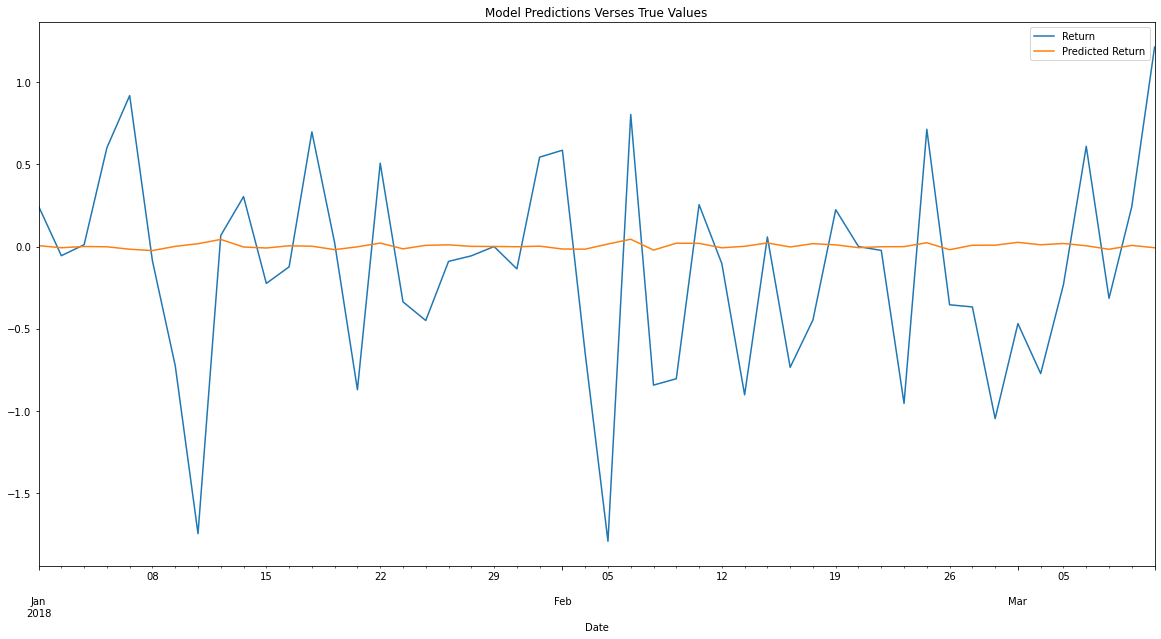

In [32]:
# Plot the first 20 predictions vs the true values
title = "Model Predictions Verses True Values"
Results[:50].plot(figsize=(20,10), title = title)

## Part Four - Out of Sample Performance 

#### Here I will evaluate the model using <u>**Out of Sample Data**</u>, also known as x-test and y-test data

In [33]:
# Import the library needed to evaluate the model
from sklearn.metrics import mean_squared_error

In [34]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
mse = mean_squared_error(
    Results["Return"],
    Results["Predicted Return"])

In [35]:
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)

# Display the RMSE
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.6445805658569028


## Part Five - In Sample Performance

#### Here I will evaluate the model using <u>**In Sample Data**</u>, also known as x-train and y-train data

In [37]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train

In [38]:
# Add a column of "in-sample" predictions to that DataFrame:  
in_sample_results["In-sample Predictions"] = model.predict(X_train)

In [39]:
# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"])

In [40]:
# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)

# Display the RMSE
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 0.841994632894117


## Part Six - Conclusion 

##### Does the model perform better or worse on out-of-sample data compared to in-sample data?

##### The model performed better on in-sample than it did on out-of-sample data. This can be proven because the RMSE on the in-sample data was smaller than that of the out-of-sample data, meaning that the predictions using in-sample data were closer to the true values than the out-sample predictions were. In this case, we can conclude that the model has been over-fitted and would need some adjustments made.